# ERA5 monthly averaged data on pressure levels for studies on climate variability

Production date: 22-05-2024

## 🌍 Use case: Monitor the impact of ENSO in the variability of tropospheric circulation in the tropical Pacific.

## ❓ Quality assessment questions

* **Is ERA5 able to consistently represent the impact of ENSO on the vertical structure of the tropical troposphere over the Pacific throughout the entire period 1940-present**

The El Niño Southern Oscillation (ENSO) affects weather patterns worldwide, influencing precipitation, storm activity, and temperatures [[1]]( https://doi.org/10.1002/9781119548164.ch14). It can cause extreme weather events such as floods, droughts, and hurricanes, impacting agriculture, water resources, and ecosystems. Understanding and predicting ENSO is crucial for mitigating its impacts on society and the environment. 

This notebook provides an assessment of the quality of ERA5 in providing a long-term physically consistent description of the atmospheric variability in the tropics with specific reference to the central Pacific, in the area of the ENSO.

## 📢 Quality assessment statement

```{admonition} These are the key outcomes of this assessment
:class: note
* ERA5 data on pressure levels provide a long-term time consistent description of the major El Niño episodes since 1940. 
* ERA5 provides physically coherent information on the expected impact the major warm El Nino episodes on the local variability of tropospheric dynamics.
* Hence, ERA5 data on  is a reliable source for the investigation of the longer-term impact of climate change on the dynamics of El Niño Southern Oscillation
```

## 📋 Methodology

The analysis is focused in particular on the area underpinning the Niño 3.4 index (5S-5N, 170W-120W). We consider the variability of the Walker circulation [[2]](https://doi.org/10.3402/tellusa.v18i4.9712) , a large-scale atmospheric circulation pattern over the equatorial Pacific, characterized by east-west trade winds at the surface, rising air over the warm western Pacific, west-to-east upper-level winds, and descending air over the cooler eastern Pacific. The analysis is performed by considering the monthly anomalies of temperature and the associated changes in the low-level easterly winds as well as the corresponding higher-level westerlies. The impact on realtive humidity and cloud cover is also considered.

The analysis and results are organized in the following steps, which are detailed in the sections below:

**[](id1)**
  * Import required packages
  * Define data request
      
**[](id2)**
  * Dataset retrieval an processing
  * Define the timing of major El Niño episodes
      
**[](id3)**
  * Display results
  * Discussion 

## 📈 Analysis and results

(id1)=
### 1. Choose the data to use and setup the code

#### Import required packages
Only a few standard libraries are sufficients for this notebook: `xarray` for the handling of datasets, `matplotlib` for the graphical output and `numpy` to convert the dates of the major ENSO events.

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from c3s_eqc_automatic_quality_control import diagnostics, download

#### Define data request

For this quality assessement, data with the following characteristics are required:

* the entire time span of ERA5, from 1940 to present;
* 5 variables to summarize key dynamic, thermodynamic and chemical aspects of the state of the atmosphere;
* 27 pressure levels of ERA5.

In [2]:
collection_id = "reanalysis-era5-pressure-levels-monthly-means"

start = "1940-01"
stop = None  # None: present

variables = [
    "temperature",
    "u_component_of_wind",
    "relative_humidity",
    "fraction_of_cloud_cover", 
    "vertical_velocity",
]

pressure_levels = ["100","125","150","175","200","225","250","300","350","400",
                   "450","500","550","600","650","700","750","775","800","825",
                   "850","875","900","925","950","975","1000"]

(id2)=
### 2. Datasets retrieval and computation of the weighted average

#### Retrieve and transform data

The analysis in focused on the local effects of ENSO. Therefore ERA5 data on pressure levels are retrieved over the area of the NINO3.4 index [[3]](https://doi.org/10.1175/1520-0477(1997)078<2771:TDOENO>2.0.CO;2), which is commonly adopted as a conventional basis for the definition of NINO events. 

A basic processing is applied to the data, consisting of:

1. Download the ERA5 monthly temperature, U component of wind, vertical velocity, realtive humidity and cloud cover for the period 1940 - to present on all pressure levels available.
2. Calculate the spatial weighted mean of each variable over the NINO3.4 area.
3. Calculate the difference betweethe monthly vertical profiles of each variable and the corresponding monthly climatology.

NOTE: the units of the vertical pressure levels are converted from Pascal (Pa) to hecto-Pascal (hPa), which is equivalent to millibars (mb).

In [10]:
datasets = []
for variable in variables:
    print(f"Downloading and processing {variable}")
    #Define a general request
    request = {
     "format": "grib",
     "product_type": "monthly_averaged_reanalysis",
     "variable": variable,
     "pressure_level": pressure_levels ,
     "time": "00:00",
     "area": 
        [5, -170, -5, -120]
    }
    #Update the request dictionary to include all dates between start and stop
    requests = download.update_request_date(request, start=start, stop=stop)
    
    ds = download.download_and_transform(
      collection_id,
      requests,
      transform_func=diagnostics.spatial_weighted_mean,
      chunks={"year": 1}
    )
    datasets.append(ds)
ds_era5 = xr.merge(datasets)

#Convert plev to hPa (mb)
ds_era5["plev"] = ds_era5["plev"]/100
ds_era5["plev"].attrs.update({"long_name": "Level", "units": "hPa"})

100%|██████████| 84/84 [00:08<00:00, 10.27it/s]


100%|██████████| 84/84 [00:07<00:00, 10.96it/s]


100%|██████████| 84/84 [00:07<00:00, 10.60it/s]


100%|██████████| 84/84 [00:07<00:00, 11.62it/s]


100%|██████████| 84/84 [00:07<00:00, 10.85it/s]


#### Define the timing of major El Niño episodes

The timing of the major Niño episodes are derived from an independent source - the [
Historical El Niño/ La Niña episodes (1950-present)](https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php)  web page at the Climate Prediction Center CPC - and  only episodes with Oceanic Niño Index > 1°C are considered. For convenience, we set the timing of each warm episode at the beginning of the central month of the corresponding peak value of the Oceanic Niño Index in the CPC table. Note that the CPC table reports past El Niño episodes until 1950, whereas the analysis performed with ERA5 goes back to 1940.
.

In [4]:
ninos = [
    '1951-10-01',
    '1958-01-01',
    '1963-11-01',
    '1965-10-01',
    '1969-01-01',
    '1972-10-01',
    '1982-11-01',
    '1987-08-01',
    '1992-01-01',
    '1997-10-01',
    '2002-11-01',
    '2009-12-01',
    '2015-11-01',
    ]

(id3)=
### 3. Plot and describe results

Results are illustrated by means of Hovmöller diagrams showing each variable as a function in time vs pressure, with vertical lines emphasizing the timing of all major El Niño episodes

The local impact of El Niño on atmospheric dynamics is described by showing for each variable the time series of the vertical profiles of monthly anomalies compared to the mean values over the entire period covered by ERA5.  The color ranges are set to emphasize the main features in the long term variability. We use a linear vertical scale for all variables, in order to focus on the processes occurring in the troposphere.  

t min.:-4.911510087996021  max:3.7686599673425007
u min.:-25.134435210605417  max:19.398713666322774
r min.:-23.12863555654127  max:46.092628059811325
cc min.:-0.11318701877117414  max:0.491990246796542
w min.:-0.12235996312153946  max:0.03926223057248084


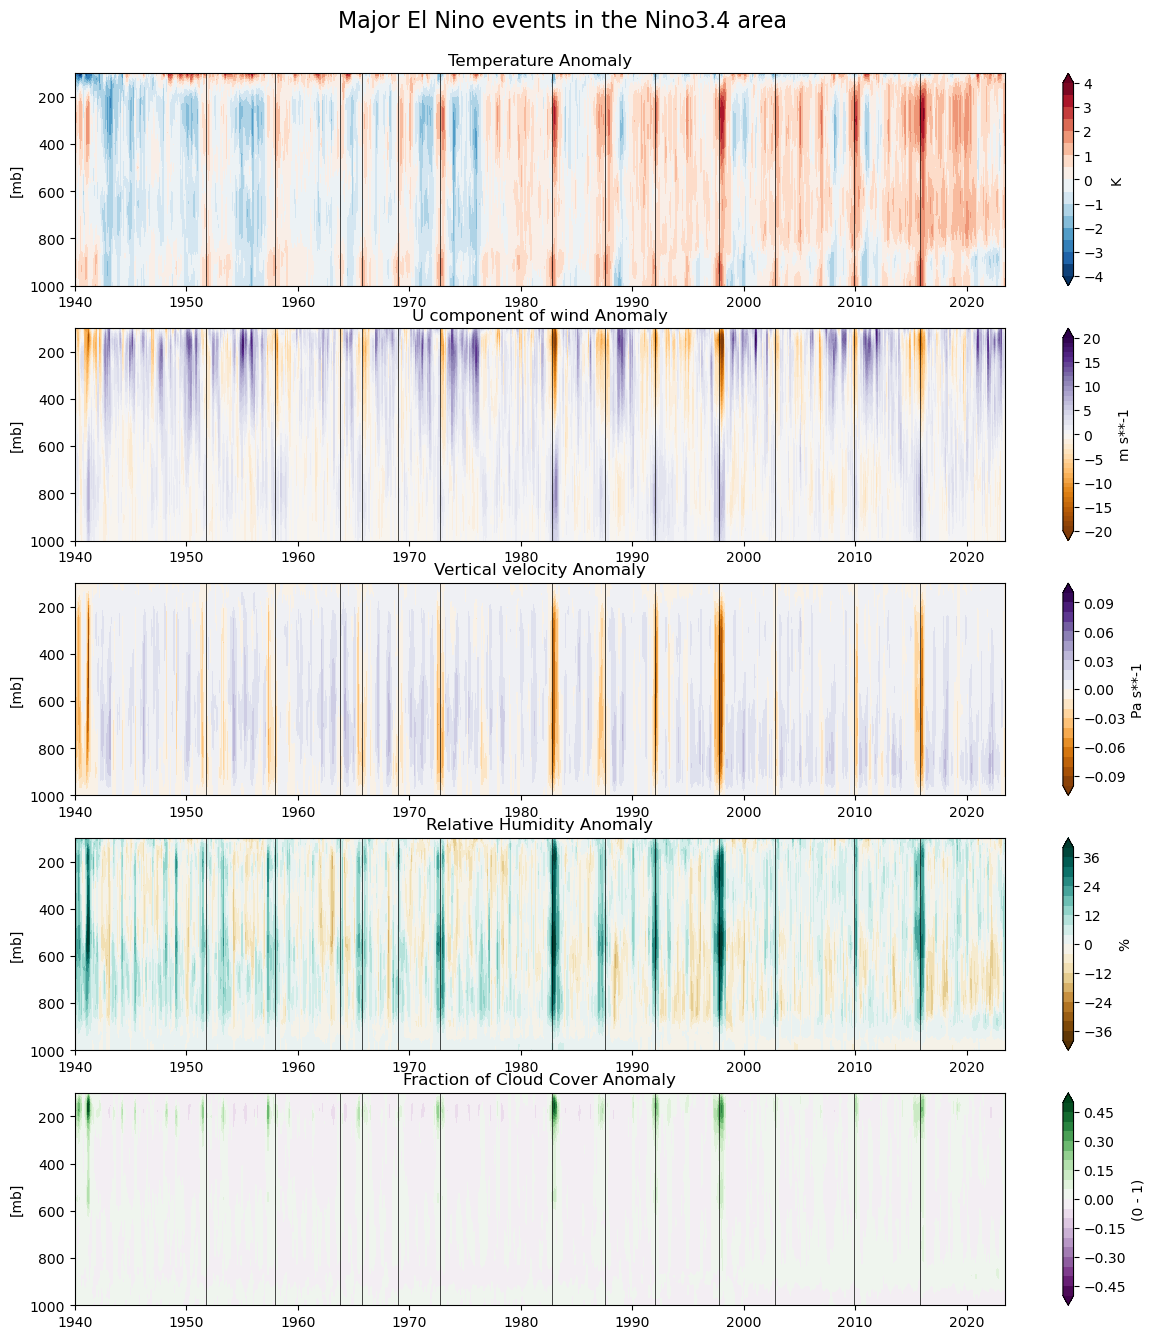

In [12]:
with xr.set_options(keep_attrs=True):
    ds_anoma = ds_era5.groupby("forecast_reference_time.month") - ds_era5.groupby("forecast_reference_time.month").mean("forecast_reference_time")
    for varname in list(ds_anoma.data_vars):
      ds_anoma[varname].attrs["long_name"] = ds_era5[varname].attrs["long_name"] + " anomaly"
      print(f"{varname} min.:{ds_anoma[varname].sel(plev=slice(1000,10)).min().values}  max:{ds_anoma[varname].sel(plev=slice(1000,10)).max().values}")

toplot = {
    "Temperature" : {
       "vname"   : "t",
       "levels"  : np.arange(-4, 4+0.5, 0.5),
       "cmap"    : "RdBu_r"
    },
    "U component of wind" : {
       "vname"   : "u",
       "levels"  : np.arange(-20, 20+1, 1),
       "cmap"    : "PuOr"
    },
    "Vertical velocity" : {
       "vname"   : "w",
       "levels"  : np.arange(-0.1, 0.1+0.01, 0.01),
       "cmap"    : "PuOr"
    },    
    "Relative Humidity" : {
       "vname"   : "r",
       "levels"  : np.arange(-40, 40+4, 4),
       "cmap"    : "BrBG"
    },
    "Fraction of Cloud Cover" : {
       "vname"   : "cc",
       "levels"  : np.arange(-0.5, 0.5+0.05, 0.05),
       "cmap"    : "PRGn"
    },
}

fig, axs = plt.subplots(len(toplot))

for i, (varname,attr) in enumerate(toplot.items()):
    cf = axs[i].contourf(ds_anoma["forecast_reference_time"],ds_anoma["plev"],
                         ds_anoma[attr["vname"]].transpose("plev","forecast_reference_time"),
                         cmap=attr["cmap"],extend='both',levels=attr["levels"])
    axs[i].set_yscale("linear")
    axs[i].set_yticks([1000,800,600,400,200])
    axs[i].set_title(varname + ' Anomaly')
    axs[i].invert_yaxis()
    axs[i].set_ylabel('[mb]')
    axs[i].set_xlabel("")
    axs[i].set_ylim([1000,100])
    fig.colorbar(cf, ax=axs[i], label=ds_anoma[attr["vname"]].attrs["units"])   
    # Add eruptions
    for nino in ninos:   
        nino_date = np.datetime64(nino)
        axs[i].axvline(nino_date, color='black', linestyle='-', lw=0.5)
        
fig.suptitle('Major El Nino events in the Nino3.4 area', fontsize=16, x=0.45, y=0.92)    
fig.set_size_inches(15,16)

In the figure above, all major El Niño episodes are well described, and the vertical structure of the local atmospheric dynamics over the NINO3.4 index area is coherent with the mechanism of variability described by Lau and Yang (2003)[[4]](https://doi.org/10.1016/B0-12-227090-8/00450-4).

* Warm **temperature** anomalies are  occur in the higher troposphere, in line with the atmospheric deep convenction mechanism initially described in previous studies [[5]](https://doi.org/10.1029/JC092iC13p14197).
* During El Niño episodes the the weakening of easterly winds (from west to east) at the surface correspond to a positive sign anomaly in the **U component of the wind** (which is positive from west to east).  At the same time, the weakening of westerly winds at in the higer troposphere is associated to anomalies of a negative sign.
* Negative anomalies in the **vertical velocity** expressed $\omega$ in $Pa/s^{-1}$, correspond to stronger uplift in terms of vertical velocity $w$ expressed in $m/s$, corresponding to a stronger deep convection activity.
* As a consequence, the area is also characterized by higher values of **relative umidity** and a larger fraction of **cloud cover** by high clouds.

Notice that the stong El Niño episode of 1940-1942 is not reported in the CPC table but has been already docuemented in previous studies [[6]](https://doi.org/10.1038/nature02982) and is well captured in the back extention of ERA5, consistently with the more recent episodes. 

A closer look at this mechanism of variability is presented in the figure below, which shows in more details the El Niño episode of 1997/1998.

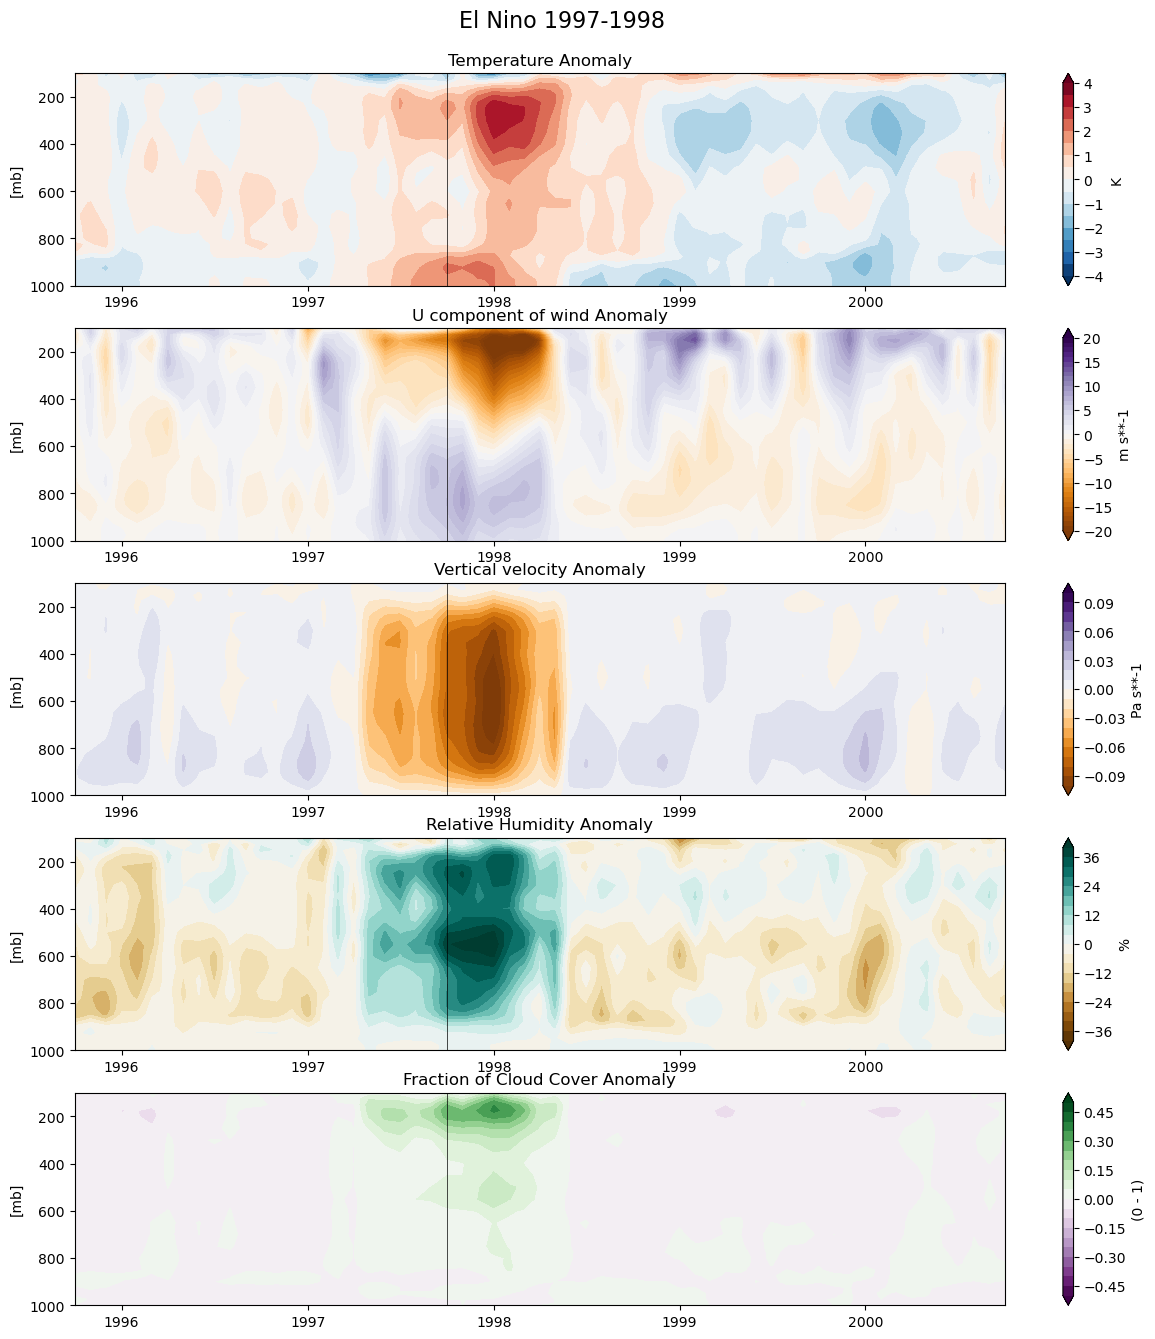

In [11]:

#Set time interval to display
xlim=np.array(['1995-10-01','2000-10-01'], dtype='datetime64') # Zoom on the warm event of 1997-1998

fig, axs = plt.subplots(len(toplot))

for i, (varname,attr) in enumerate(toplot.items()):
    cf = axs[i].contourf(ds_anoma["forecast_reference_time"],ds_anoma["plev"],
                         ds_anoma[attr["vname"]].transpose("plev","forecast_reference_time"),
                         cmap=attr["cmap"],extend='both',levels=attr["levels"])
    axs[i].set_yscale("linear")
    axs[i].set_yticks([1000,800,600,400,200])
    axs[i].set_title(varname + ' Anomaly')
    axs[i].invert_yaxis()
    axs[i].set_ylabel('[mb]')
    axs[i].set_xlabel("")
    axs[i].set_ylim([1000,100])
    axs[i].set_xlim(xlim)
    fig.colorbar(cf, ax=axs[i], label=ds_anoma[attr["vname"]].attrs["units"])   
    # Add eruptions
    for nino in ninos:   
        nino_date = np.datetime64(nino)
        axs[i].axvline(nino_date, color='black', linestyle='-', lw=0.5)
        
fig.suptitle('El Nino 1997-1998', fontsize=16, x=0.45, y=0.92)    
fig.set_size_inches(15,16)

## ℹ️ If you want to know more

### References

[[1]]( https://doi.org/10.1002/9781119548164.ch14) Taschetto, A. S., Ummenhofer, C. C., Stuecker, M. F., Dommenget, D., Ashok, K., Rodrigues, R. R., & Yeh, S. W. (2020). ENSO atmospheric teleconnections. El Niño southern oscillation in a changing climate, 309-335.

[[2]](https://doi.org/10.3402/tellusa.v18i4.9712) Bjerknes, J. (1966). A possible response of the atmospheric Hadley circulation to equatorial anomalies of ocean temperature. Tellus, 18(4), 820-829.

[[3]](https://doi.org/10.1175/1520-0477(1997)078<2771:TDOENO>2.0.CO;2) Trenberth, K. E. (1997). The definition of el nino. Bulletin of the American Meteorological Society, 78(12), 2771-2778.

[[4]](https://doi.org/10.1016/B0-12-227090-8/00450-4) Lau, K. M., & Yang, S. (2003). Walker circulation. Encyclopedia of atmospheric sciences, 2505(2510), 00450-4.

[[5]](https://doi.org/10.1029/JC092iC13p14197) Gage, K. S., & Reid, G. C. (1987). Longitudinal variations in tropical tropopause properties in relation to tropical convection and El Niño‐Southern Oscillation events. Journal of Geophysical Research: Oceans, 92(C13), 14197-14203.

[[6]](https://doi.org/10.1038/nature02982) Brönnimann, S., Luterbacher, J., Staehelin, J., Svendby, T. M., Hansen, G., & Svenøe, T. (2004). Extreme climate of the global troposphere and stratosphere in 1940–42 related to El Niño. Nature, 431(7011), 971-974.




